# Polynomial Regression
linear regression model:  
http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

In [21]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(50).reshape(10, 5)
print(X.shape)
poly = PolynomialFeatures(3)
X_poly = poly.fit_transform(X) # mean fit + transform

print(X_poly.shape)

(10, 5)
(10, 56)


In [9]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
X = np.arange(6).reshape(3, 2)

print('X is \n{}'.format(X))

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X) # mean fit + transform

# fit_transform is equivalent to fit + transform
#poly.fit(X)
#X_poly = poly.transform(X)


print('X_poly is \n{}'.format(X_poly))

X is 
[[0 1]
 [2 3]
 [4 5]]
X_poly is 
[[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing

def f(x):
    """ function to approximate by polynomial interpolation"""
    return x * np.sin(x)


# create 100 data points that is uniformly in the range [0, 10] 
X = np.linspace(0, 10, 100)
np.random.shuffle(X)
X = X.reshape(-1,1)
# print(X)
y = f(X)
print('after reshaping, shape of X is {}'.format(X.shape))

# show origin X data (only the first 5 data points)
print('origin X is {}:'.format(X[:5]))

poly = PolynomialFeatures(degree=2).fit(X)
X_poly = poly.transform(X)

# show poly transform X data (only the first 5 data points)
print('after ploy transform X is {}:'.format(X_poly[:5]))


X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=1) #random_state 種子值

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(r2_score(y_test, y_pred)))

after reshaping, shape of X is (100, 1)
origin X is [[6.66666667]
 [0.60606061]
 [9.39393939]
 [5.75757576]
 [9.8989899 ]]:
after ploy transform X is [[ 1.          6.66666667 44.44444444]
 [ 1.          0.60606061  0.36730946]
 [ 1.          9.39393939 88.24609734]
 [ 1.          5.75757576 33.1496786 ]
 [ 1.          9.8989899  97.99000102]]:
Coefficients: [[ 0.         -1.75562935  2.54755386]]

Mean squared error: 11.355980998404029
Variance score: 0.10530531896432105


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
def f(x):
    """ function to approximate by polynomial interpolation"""
    return x* x * x - 3 *x  + 1


# create 100 data points that is uniformly in the range [0, 10] 
X = np.linspace(0, 10, 100)
np.random.shuffle(X)
X = X.reshape(-1,1)
y = f(X)
print('after reshaping, shape of X is {}'.format(X.shape))

# show origin X data (only the first 5 data points)
print('origin X is {}:'.format(X[:5]))

poly = PolynomialFeatures(degree=2).fit(X)
X_poly = poly.transform(X)

# show poly transform X data (only the first 5 data points)
print('after ploy transform X is {}:'.format(X_poly[:5]))


X_train,X_test,y_train,y_test=train_test_split(X_poly,y,test_size=0.3,random_state=1) #random_state 種子值

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)

model = linear_model.LinearRegression()
model.fit(X_train, y_train)

X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: {}\n'.format(model.coef_))
# The mean squared error
print("Mean squared error: {}".format(mean_squared_error(y_test, y_pred)))
# Explained variance score: 1 is perfect prediction
print('Variance score: {}'.format(r2_score(y_test, y_pred)))

after reshaping, shape of X is (100, 1)
origin X is [[7.47474747]
 [6.26262626]
 [5.35353535]
 [3.13131313]
 [8.38383838]]:
after ploy transform X is [[ 1.          7.47474747 55.87184981]
 [ 1.          6.26262626 39.22048771]
 [ 1.          5.35353535 28.66034078]
 [ 1.          3.13131313  9.80512193]
 [ 1.          8.38383838 70.28874605]]:
Coefficients: [[   0.         -195.64266544  475.79153676]]

Mean squared error: 477.07319867947706
Variance score: 0.9920951150932674


rmse is 102.42325465734493
R2 is 0.8537647164420812


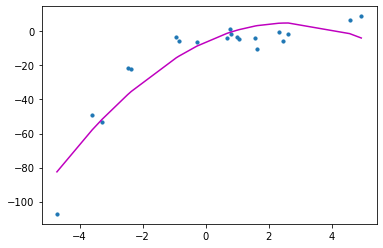

In [16]:
import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = mean_squared_error(y,y_poly_pred)
r2 = r2_score(y,y_poly_pred)
print('rmse is {}'.format(rmse))
print('R2 is {}'.format(r2))

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()